In [40]:
import numpy as np


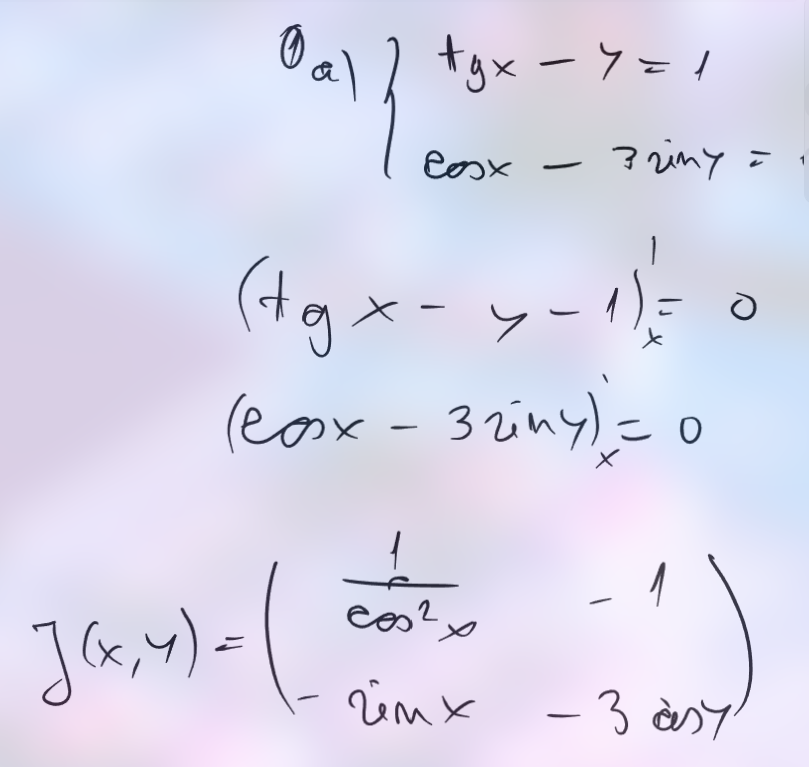

In [41]:
def Fa(xy):
    x, y = xy
    f1 = np.tan(x) - y -1
    f2 = np.cos(x) - 3 * np.sin(y)
    return np.array([f1, f2])
def Ja(xy):
    x, y = xy
    df1_dx = 1/(np.cos(x)**2)
    df1_dy = -1
    df2_dx = -np.sin(x)
    df2_dy = -3*np.cos(y)
    return np.array([[df1_dx, df1_dy],
                     [df2_dx, df2_dy]])

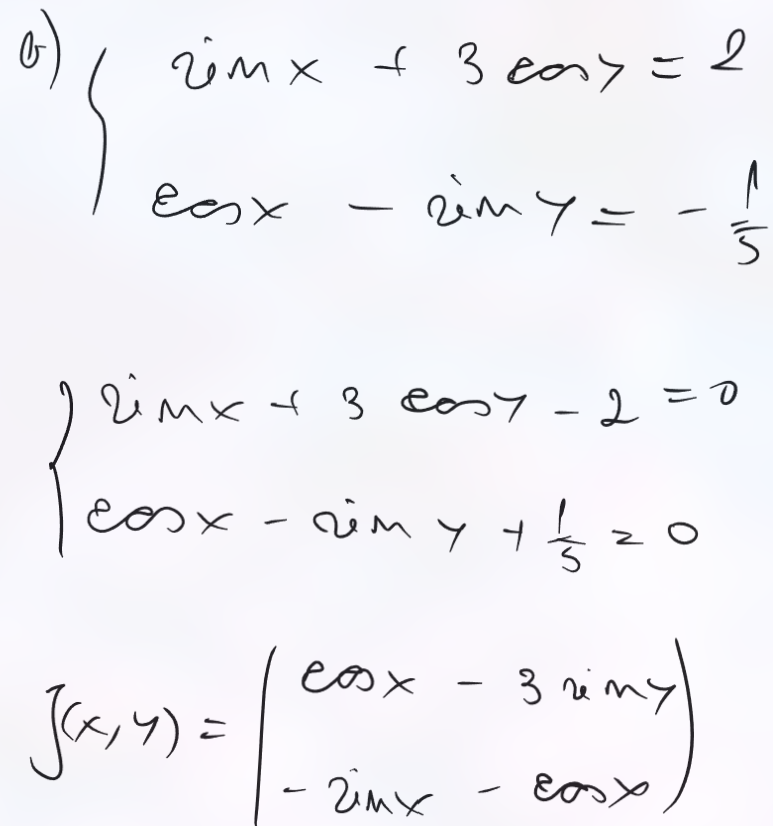

In [42]:

def Fb(xy):
    x, y = xy
    f1 = np.sin(x) + 3 * np.cos(y) - 2
    f2 = np.cos(x) - np.sin(y) + 1/5
    return np.array([f1, f2])

def Jb(xy):
    x, y = xy
    df1_dx = np.cos(x)
    df1_dy = -3 * np.sin(y)
    df2_dx = -np.sin(x)
    df2_dy = -np.cos(y)
    return np.array([[df1_dx, df1_dy],
                     [df2_dx, df2_dy]])
    


In [43]:

def newton(F, J, xy0, tol=1e-2, max_iter=20):
    xy = np.array(xy0, dtype=float)
    for i in range(max_iter):
        F_val = F(xy)
        J_val = J(xy)
        
        try:
            delta = np.linalg.solve(J_val, -F_val)
        except np.linalg.LinAlgError:
            print("singularis")
            break
        
        xy_new = xy + delta
        
        print(f"iter {i+1}: x = {xy_new[0]:.10f}, y = {xy_new[1]:.10f}, F = {F_val[0]:.2f}, {F_val[1]:.2f}, delta = {delta[0]:.10f}, {delta[1]:.10f}")
        
        if np.linalg.norm(delta) < tol:
            print("Konvergal!")
            return xy_new
        
        xy = xy_new

    print("nem konvergal!")
    return xy

initial_guess = [0.0, 0.0]  
solution = newton(Fa, Ja, initial_guess)

print(f"\nmegkozelitett megoldas: x = {solution[0]:.2f}, y = {solution[1]:.10f}")


solution = newton(Fb, Jb, initial_guess)

print(f"\nmegkozelitett megoldas: x = {solution[0]:.10f}, y = {solution[1]:.10f}")



iter 1: x = 1.3333333333, y = 0.3333333333, F = -1.00, 1.00, delta = 1.3333333333, 0.3333333333
iter 2: x = 1.1670650951, y = 0.1270649889, F = 2.80, -0.75, delta = -0.1662682382, -0.2062683444
iter 3: x = 0.9888958599, y = 0.1863855571, F = 1.21, 0.01, delta = -0.1781692352, 0.0593205682
iter 4: x = 0.8954659617, y = 0.2107206893, F = 0.33, -0.01, delta = -0.0934298982, 0.0243351321
iter 5: x = 0.8818127620, y = 0.2135558769, F = 0.04, -0.00, delta = -0.0136531996, 0.0028351877
iter 6: x = 0.8815926495, y = 0.2135947052, F = 0.00, -0.00, delta = -0.0002201125, 0.0000388283
Konvergal!

megkozelitett megoldas: x = 0.88, y = 0.2135947052
iter 1: x = -1.0000000000, y = 1.2000000000, F = 1.00, 1.20, delta = -1.0000000000, 1.2000000000
iter 2: x = -1.0461742798, y = 0.5636369197, F = -1.75, -0.19, delta = -0.0461742798, -0.6363630803
iter 3: x = -1.6122940793, y = 0.1811033342, F = -0.33, 0.17, delta = -0.5661197994, -0.3825335854
iter 4: x = -1.6738456177, y = 0.0966223310, F = -0.05, -0.0